## Convolutional Neural Networks
Notes from Lukas Biewald's [Crowdflower Machine Learning class](https://github.com/lukas/ml-class)

### CNN Demo

Perform a convolution on an image:

Original image


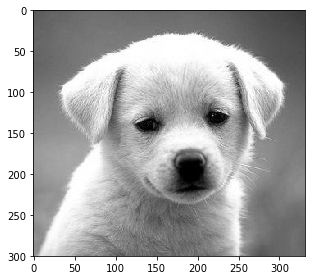

Convolved image


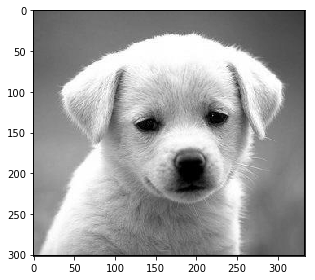

In [31]:
#convolution-demo.py
import numpy as np
from skimage import io, data
from scipy.signal import convolve2d

image = io.imread('dog.jpg', as_grey=True)

kernel = [[0.0, 0.0, 0.0],
          [0.0, 1.0, 0.0],
          [0.0, 0.0, 0.0]]

new_image = convolve2d(image, kernel)
new_image = new_image.clip(0.0, 1.0)

print("Original image")
io.imshow(image)
io.show()
print("Convolved image")
io.imshow(new_image)
io.show()

### Maxpool Demo
Downsample an image by applying a `max` function to local blocks:

In [38]:
from skimage.measure import block_reduce
new_image = block_reduce(image, block_size=(5, 5), func=np.max)

Max-pooled image


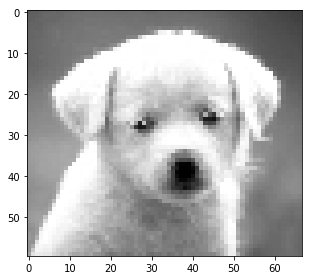

In [39]:
print("Max-pooled image")
io.imshow(new_image)
io.show()

### MNIST digit analysis using CNN

In [42]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s - loss: 0.1454 - acc: 0.9580 - val_loss: 0.0577 - val_acc: 0.9808
Epoch 2/10
60000/60000 [==============================] - 27s - loss: 0.0477 - acc: 0.9852 - val_loss: 0.0525 - val_acc: 0.9831
Epoch 3/10
60000/60000 [==============================] - 28s - loss: 0.0305 - acc: 0.9904 - val_loss: 0.0430 - val_acc: 0.9858
Epoch 4/10
60000/60000 [==============================] - 29s - loss: 0.0203 - acc: 0.9935 - val_loss: 0.0441 - val_acc: 0.9866
Epoch 5/10
60000/60000 [==============================] - 29s - loss: 0.0128 - acc: 0.9959 - val_loss: 0.0480 - val_acc: 0.9877
Epoch 6/10
60000/60000 [==============================] - 30s - loss: 0.0110 - acc: 0.9966 - val_loss: 0.0505 - val_acc: 0.9855
Epoch 7/10
60000/60000 [==============================] - 32s - loss: 0.0070 - acc: 0.9977 - val_loss: 0.0502 - val_acc: 0.9877
Epoch 8/10
60000/60000 [==============================

Visualizing the layers:

In [43]:
from keras.models import load_model
import matplotlib as plt
import matplotlib.gridspec as gridspec

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#inspect-net.py
display_width = 8
display_height = 8

def visualize_layer(out, depth):
    if len(out.shape) == 4:
        for i in range(min(8, out.shape[3])):
            plt.subplot2grid((display_height, display_width), (depth, i))
            